# Random forest feature inspection function

## Inspecting feature importance

### Building the Random forest classifier

In [9]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split


def train_rf_model(X_train,y_train, X_test):
    # Random forest model
    rf = RandomForestClassifier(n_estimators=10, random_state=12)

    # Fitting the model
    rf.fit(X_train, y_train)

    # Predicting values
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    return rf, y_train_pred, y_test_pred    

### Testing with toy dataset from sklearn

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
data = load_wine()


X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target)
y = np.array(y)
y = np.ravel(y)

X_train, X_test, y_train, y_test = train_test_split(X,y)

rf, y_train_pred, y_test_pred = train_rf_model(X_train, y_train, X_test)

## Feature importances

### Get the feature importances

In [12]:
def get_feature_importances(trained_model, X_train):
    feature_importances = pd.DataFrame(trained_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
    return feature_importances
    

### One function to call them all

In [13]:
import nbimporter
import performance_measure

def get_rf_model(X_train, X_test, y_train, y_test):
    rf, y_train_pred, y_test_pred = train_rf_model(X_train,y_train, X_test)
    features_imp = get_feature_importances(rf,X_train)
    performance_measure.plot_confusion_matrix(y_test,y_test_pred, normalize=True)
    performance_measure.get_performance_measures(y_test, y_test_pred)
    return features_imp
    

Normalized confusion matrix
[[1.         0.         0.        ]
 [0.05263158 0.94736842 0.        ]
 [0.         0.         1.        ]]


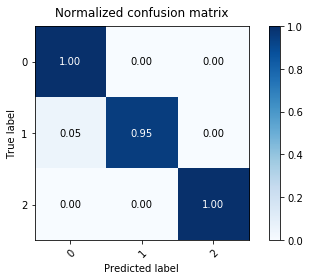

Total Accuracy 		0.978

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
0                         	 0.933 		 1.000 		 0.966
1                         	 1.000 		 0.947 		 0.973
2                         	 1.000 		 1.000 		 1.000


,importance
color_intensity,0.206775
proline,0.202663
flavanoids,0.192051
alcohol,0.100837
od280/od315_of_diluted_wines,0.073053
hue,0.062690
alcalinity_of_ash,0.054736
malic_acid,0.039112
proanthocyanins,0.026576
total_phenols,0.014470


In [19]:
rf = get_rf_model(X_train, X_test, y_train,y_test)
rf